### Bool Mask and bool indexing

In [2]:
import numpy as np
import pandas as pd

In [3]:
floats = pd.DataFrame(np.random.randn(7, 4))

In [4]:
floats

,0,1,2,3
0,-0.614559,0.478502,0.325762,-0.524211
1,0.061570,-0.234019,-1.061262,0.654638
2,-0.541114,0.769876,-0.331304,1.565840
3,0.646450,1.539222,0.365923,1.003390
4,2.225416,0.347428,2.514112,0.787159
5,1.736524,1.136044,0.903500,0.323373
6,-1.382084,-0.039169,-0.011281,0.077201


In [5]:
floats = pd.DataFrame(np.random.randn(7, 4), columns=["A", "B", "C", "D"])

In [6]:
floats

,A,B,C,D
0,1.626290,0.512159,0.518771,-0.465852
1,-1.675584,-1.177667,0.365535,0.463203
2,-0.653671,-0.123718,2.376956,-0.055998
3,0.781629,1.959039,-0.767245,0.209160
4,-0.416983,-0.274893,-1.435353,2.428709
5,0.732857,1.283980,-0.007280,-0.918649
6,-1.695864,0.737930,0.231984,-0.647277


In [7]:
floats["B"]

0    0.512159
1   -1.177667
2   -0.123718
3    1.959039
4   -0.274893
5    1.283980
6    0.737930
Name: B, dtype: float64

In [11]:
# Creating bool mask for column "B"
floats["B"] >= 0

0     True
1    False
2    False
3     True
4    False
5     True
6     True
Name: B, dtype: bool

In [12]:
# Selecting all rows where "B" >= 0
floats[floats["B"] >= 0]

,A,B,C,D
0,1.626290,0.512159,0.518771,-0.465852
3,0.781629,1.959039,-0.767245,0.209160
5,0.732857,1.283980,-0.007280,-0.918649
6,-1.695864,0.737930,0.231984,-0.647277


In [13]:
floats.loc[0, :]

A    1.626290
B    0.512159
C    0.518771
D   -0.465852
Name: 0, dtype: float64

In [14]:
# Creating bool mask for row "0"
floats.loc[0, :] >= 0

A     True
B     True
C     True
D    False
Name: 0, dtype: bool

In [15]:
# Selecting all columns where "0" >= 0
floats.loc[:, floats.loc[0, :] >= 0]

,A,B,C
0,1.626290,0.512159,0.518771
1,-1.675584,-1.177667,0.365535
2,-0.653671,-0.123718,2.376956
3,0.781629,1.959039,-0.767245
4,-0.416983,-0.274893,-1.435353
5,0.732857,1.283980,-0.007280
6,-1.695864,0.737930,0.231984


### Querying data
Filtering rows based on values of certain attributes can be done either with bool index or pandas query method

In [17]:
autos = pd.read_json("../Data/autos_json.json")

In [18]:
autos

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
0,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,13495.0,2.68,3,88.6,64.1
1,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,16500.0,2.68,3,88.6,64.1
2,std,hatchback,2.68,19,9.0,2823,rwd,front,152,ohcv,...,alfa-romero,NaN,six,two,5000.0,16500.0,3.47,1,94.5,65.5
3,std,sedan,3.19,24,10.0,2337,fwd,front,109,ohc,...,audi,164.0,four,four,5500.0,13950.0,3.40,2,99.8,66.2
4,std,sedan,3.19,18,8.0,2824,4wd,front,136,ohc,...,audi,164.0,five,four,5500.0,17450.0,3.40,2,99.4,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,std,sedan,3.78,23,9.5,2952,rwd,front,141,ohc,...,volvo,95.0,four,four,5400.0,16845.0,3.15,-1,109.1,68.9
201,turbo,sedan,3.78,19,8.7,3049,rwd,front,141,ohc,...,volvo,95.0,four,four,5300.0,19045.0,3.15,-1,109.1,68.8
202,std,sedan,3.58,18,8.8,3012,rwd,front,173,ohcv,...,volvo,95.0,six,four,5500.0,21485.0,2.87,-1,109.1,68.9
203,turbo,sedan,3.01,26,23.0,3217,rwd,front,145,ohc,...,volvo,95.0,six,four,4800.0,22470.0,3.40,-1,109.1,68.9


In [19]:
autos.head(3)

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
0,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,13495.0,2.68,3,88.6,64.1
1,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,16500.0,2.68,3,88.6,64.1
2,std,hatchback,2.68,19,9.0,2823,rwd,front,152,ohcv,...,alfa-romero,NaN,six,two,5000.0,16500.0,3.47,1,94.5,65.5


In [21]:
autos[autos["make"] == "volvo"]

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
194,std,sedan,3.78,23,9.5,2912,rwd,front,141,ohc,...,volvo,103.0,four,four,5400.0,12940.0,3.15,-2,104.3,67.2
195,std,wagon,3.78,23,9.5,3034,rwd,front,141,ohc,...,volvo,74.0,four,four,5400.0,13415.0,3.15,-1,104.3,67.2
196,std,sedan,3.78,24,9.5,2935,rwd,front,141,ohc,...,volvo,103.0,four,four,5400.0,15985.0,3.15,-2,104.3,67.2
197,std,wagon,3.78,24,9.5,3042,rwd,front,141,ohc,...,volvo,74.0,four,four,5400.0,16515.0,3.15,-1,104.3,67.2
198,turbo,sedan,3.62,17,7.5,3045,rwd,front,130,ohc,...,volvo,103.0,four,four,5100.0,18420.0,3.15,-2,104.3,67.2
199,turbo,wagon,3.62,17,7.5,3157,rwd,front,130,ohc,...,volvo,74.0,four,four,5100.0,18950.0,3.15,-1,104.3,67.2
200,std,sedan,3.78,23,9.5,2952,rwd,front,141,ohc,...,volvo,95.0,four,four,5400.0,16845.0,3.15,-1,109.1,68.9
201,turbo,sedan,3.78,19,8.7,3049,rwd,front,141,ohc,...,volvo,95.0,four,four,5300.0,19045.0,3.15,-1,109.1,68.8
202,std,sedan,3.58,18,8.8,3012,rwd,front,173,ohcv,...,volvo,95.0,six,four,5500.0,21485.0,2.87,-1,109.1,68.9
203,turbo,sedan,3.01,26,23.0,3217,rwd,front,145,ohc,...,volvo,95.0,six,four,4800.0,22470.0,3.40,-1,109.1,68.9


In [22]:
import seaborn as sns

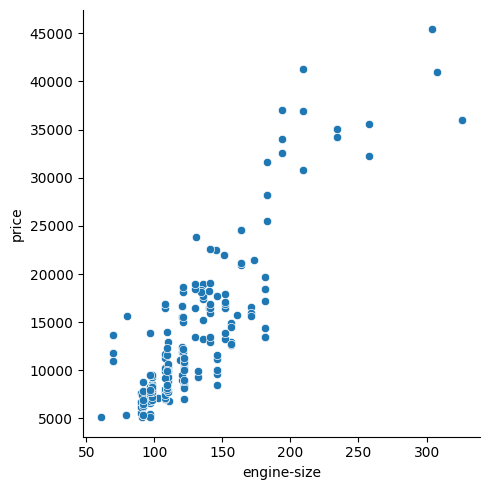

In [23]:
sns.relplot(x="engine-size", y="price", data=autos)

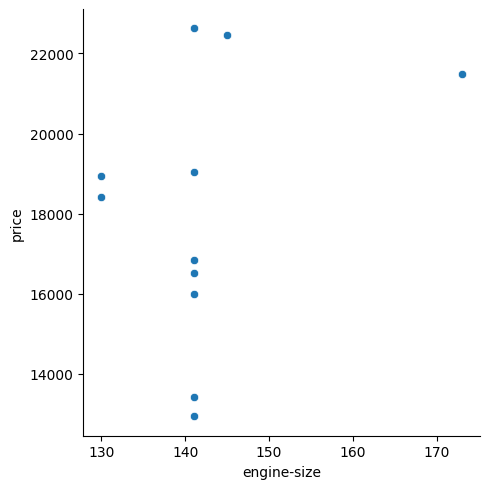

In [24]:
sns.relplot(x="engine-size", y="price", data=autos[autos["make"] == "volvo"])

In [25]:
autos.query("make == 'volvo'")

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
194,std,sedan,3.78,23,9.5,2912,rwd,front,141,ohc,...,volvo,103.0,four,four,5400.0,12940.0,3.15,-2,104.3,67.2
195,std,wagon,3.78,23,9.5,3034,rwd,front,141,ohc,...,volvo,74.0,four,four,5400.0,13415.0,3.15,-1,104.3,67.2
196,std,sedan,3.78,24,9.5,2935,rwd,front,141,ohc,...,volvo,103.0,four,four,5400.0,15985.0,3.15,-2,104.3,67.2
197,std,wagon,3.78,24,9.5,3042,rwd,front,141,ohc,...,volvo,74.0,four,four,5400.0,16515.0,3.15,-1,104.3,67.2
198,turbo,sedan,3.62,17,7.5,3045,rwd,front,130,ohc,...,volvo,103.0,four,four,5100.0,18420.0,3.15,-2,104.3,67.2
199,turbo,wagon,3.62,17,7.5,3157,rwd,front,130,ohc,...,volvo,74.0,four,four,5100.0,18950.0,3.15,-1,104.3,67.2
200,std,sedan,3.78,23,9.5,2952,rwd,front,141,ohc,...,volvo,95.0,four,four,5400.0,16845.0,3.15,-1,109.1,68.9
201,turbo,sedan,3.78,19,8.7,3049,rwd,front,141,ohc,...,volvo,95.0,four,four,5300.0,19045.0,3.15,-1,109.1,68.8
202,std,sedan,3.58,18,8.8,3012,rwd,front,173,ohcv,...,volvo,95.0,six,four,5500.0,21485.0,2.87,-1,109.1,68.9
203,turbo,sedan,3.01,26,23.0,3217,rwd,front,145,ohc,...,volvo,95.0,six,four,4800.0,22470.0,3.40,-1,109.1,68.9


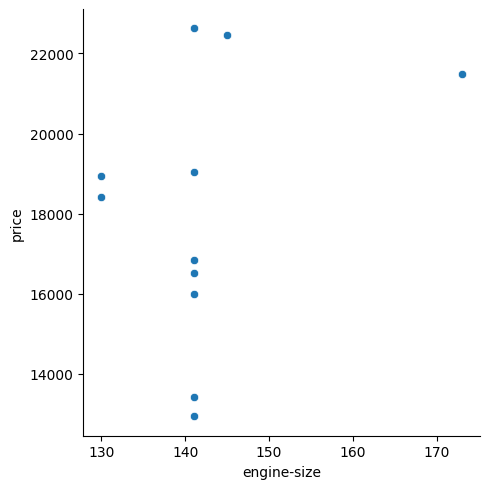

In [27]:
sns.relplot(x="engine-size", y="price", data=autos.query("make == 'volvo'"))

In [28]:
autos[autos["engine-size"] <= 140]

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
0,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,13495.0,2.68,3,88.6,64.1
1,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,16500.0,2.68,3,88.6,64.1
3,std,sedan,3.19,24,10.0,2337,fwd,front,109,ohc,...,audi,164.0,four,four,5500.0,13950.0,3.40,2,99.8,66.2
4,std,sedan,3.19,18,8.0,2824,4wd,front,136,ohc,...,audi,164.0,five,four,5500.0,17450.0,3.40,2,99.4,66.4
5,std,sedan,3.19,19,8.5,2507,fwd,front,136,ohc,...,audi,NaN,five,two,5500.0,15250.0,3.40,2,99.8,66.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,std,sedan,3.19,19,8.5,2661,fwd,front,136,ohc,...,volkswagen,NaN,five,four,5500.0,13295.0,3.40,0,100.4,66.9
192,turbo,sedan,3.01,33,23.0,2579,fwd,front,97,ohc,...,volkswagen,NaN,four,four,4500.0,13845.0,3.40,0,100.4,66.9
193,std,wagon,3.19,25,9.0,2563,fwd,front,109,ohc,...,volkswagen,NaN,four,four,5500.0,12290.0,3.40,0,100.4,66.9
198,turbo,sedan,3.62,17,7.5,3045,rwd,front,130,ohc,...,volvo,103.0,four,four,5100.0,18420.0,3.15,-2,104.3,67.2


In [30]:
autos.query("`engine-size` <= 140")

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
0,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,13495.0,2.68,3,88.6,64.1
1,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,16500.0,2.68,3,88.6,64.1
3,std,sedan,3.19,24,10.0,2337,fwd,front,109,ohc,...,audi,164.0,four,four,5500.0,13950.0,3.40,2,99.8,66.2
4,std,sedan,3.19,18,8.0,2824,4wd,front,136,ohc,...,audi,164.0,five,four,5500.0,17450.0,3.40,2,99.4,66.4
5,std,sedan,3.19,19,8.5,2507,fwd,front,136,ohc,...,audi,NaN,five,two,5500.0,15250.0,3.40,2,99.8,66.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,std,sedan,3.19,19,8.5,2661,fwd,front,136,ohc,...,volkswagen,NaN,five,four,5500.0,13295.0,3.40,0,100.4,66.9
192,turbo,sedan,3.01,33,23.0,2579,fwd,front,97,ohc,...,volkswagen,NaN,four,four,4500.0,13845.0,3.40,0,100.4,66.9
193,std,wagon,3.19,25,9.0,2563,fwd,front,109,ohc,...,volkswagen,NaN,four,four,5500.0,12290.0,3.40,0,100.4,66.9
198,turbo,sedan,3.62,17,7.5,3045,rwd,front,130,ohc,...,volvo,103.0,four,four,5100.0,18420.0,3.15,-2,104.3,67.2


In [31]:
autos[(autos["make"] == "volvo") & (autos["engine-size"] <= 140)]

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
198,turbo,sedan,3.62,17,7.5,3045,rwd,front,130,ohc,...,volvo,103.0,four,four,5100.0,18420.0,3.15,-2,104.3,67.2
199,turbo,wagon,3.62,17,7.5,3157,rwd,front,130,ohc,...,volvo,74.0,four,four,5100.0,18950.0,3.15,-1,104.3,67.2


In [32]:
autos[(autos["make"] == "volvo") | (autos["engine-size"] <= 140)]

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
0,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,13495.0,2.68,3,88.6,64.1
1,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,16500.0,2.68,3,88.6,64.1
3,std,sedan,3.19,24,10.0,2337,fwd,front,109,ohc,...,audi,164.0,four,four,5500.0,13950.0,3.40,2,99.8,66.2
4,std,sedan,3.19,18,8.0,2824,4wd,front,136,ohc,...,audi,164.0,five,four,5500.0,17450.0,3.40,2,99.4,66.4
5,std,sedan,3.19,19,8.5,2507,fwd,front,136,ohc,...,audi,NaN,five,two,5500.0,15250.0,3.40,2,99.8,66.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,std,sedan,3.78,23,9.5,2952,rwd,front,141,ohc,...,volvo,95.0,four,four,5400.0,16845.0,3.15,-1,109.1,68.9
201,turbo,sedan,3.78,19,8.7,3049,rwd,front,141,ohc,...,volvo,95.0,four,four,5300.0,19045.0,3.15,-1,109.1,68.8
202,std,sedan,3.58,18,8.8,3012,rwd,front,173,ohcv,...,volvo,95.0,six,four,5500.0,21485.0,2.87,-1,109.1,68.9
203,turbo,sedan,3.01,26,23.0,3217,rwd,front,145,ohc,...,volvo,95.0,six,four,4800.0,22470.0,3.40,-1,109.1,68.9


In [34]:
autos.query("make == 'volvo' and `engine-size` <= 140")

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
198,turbo,sedan,3.62,17,7.5,3045,rwd,front,130,ohc,...,volvo,103.0,four,four,5100.0,18420.0,3.15,-2,104.3,67.2
199,turbo,wagon,3.62,17,7.5,3157,rwd,front,130,ohc,...,volvo,74.0,four,four,5100.0,18950.0,3.15,-1,104.3,67.2


In [35]:
autos.query("make == 'volvo' or `engine-size` <= 140")

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
0,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,13495.0,2.68,3,88.6,64.1
1,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,16500.0,2.68,3,88.6,64.1
3,std,sedan,3.19,24,10.0,2337,fwd,front,109,ohc,...,audi,164.0,four,four,5500.0,13950.0,3.40,2,99.8,66.2
4,std,sedan,3.19,18,8.0,2824,4wd,front,136,ohc,...,audi,164.0,five,four,5500.0,17450.0,3.40,2,99.4,66.4
5,std,sedan,3.19,19,8.5,2507,fwd,front,136,ohc,...,audi,NaN,five,two,5500.0,15250.0,3.40,2,99.8,66.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,std,sedan,3.78,23,9.5,2952,rwd,front,141,ohc,...,volvo,95.0,four,four,5400.0,16845.0,3.15,-1,109.1,68.9
201,turbo,sedan,3.78,19,8.7,3049,rwd,front,141,ohc,...,volvo,95.0,four,four,5300.0,19045.0,3.15,-1,109.1,68.8
202,std,sedan,3.58,18,8.8,3012,rwd,front,173,ohcv,...,volvo,95.0,six,four,5500.0,21485.0,2.87,-1,109.1,68.9
203,turbo,sedan,3.01,26,23.0,3217,rwd,front,145,ohc,...,volvo,95.0,six,four,4800.0,22470.0,3.40,-1,109.1,68.9


In [36]:
autocopy = autos.copy()

In [37]:
autocopy

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
0,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,13495.0,2.68,3,88.6,64.1
1,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,16500.0,2.68,3,88.6,64.1
2,std,hatchback,2.68,19,9.0,2823,rwd,front,152,ohcv,...,alfa-romero,NaN,six,two,5000.0,16500.0,3.47,1,94.5,65.5
3,std,sedan,3.19,24,10.0,2337,fwd,front,109,ohc,...,audi,164.0,four,four,5500.0,13950.0,3.40,2,99.8,66.2
4,std,sedan,3.19,18,8.0,2824,4wd,front,136,ohc,...,audi,164.0,five,four,5500.0,17450.0,3.40,2,99.4,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,std,sedan,3.78,23,9.5,2952,rwd,front,141,ohc,...,volvo,95.0,four,four,5400.0,16845.0,3.15,-1,109.1,68.9
201,turbo,sedan,3.78,19,8.7,3049,rwd,front,141,ohc,...,volvo,95.0,four,four,5300.0,19045.0,3.15,-1,109.1,68.8
202,std,sedan,3.58,18,8.8,3012,rwd,front,173,ohcv,...,volvo,95.0,six,four,5500.0,21485.0,2.87,-1,109.1,68.9
203,turbo,sedan,3.01,26,23.0,3217,rwd,front,145,ohc,...,volvo,95.0,six,four,4800.0,22470.0,3.40,-1,109.1,68.9


In [39]:
autocopy.loc[(autos["make"] == "volvo") & (autos["engine-size"] <= 140),["price"]]

,price
198,18420.0
199,18950.0


In [40]:
autocopy.loc[(autos["make"] == "volvo") & (autos["engine-size"] <= 140),["price"]] = 0

In [41]:
autocopy.tail(10)

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
195,std,wagon,3.78,23,9.5,3034,rwd,front,141,ohc,...,volvo,74.0,four,four,5400.0,13415.0,3.15,-1,104.3,67.2
196,std,sedan,3.78,24,9.5,2935,rwd,front,141,ohc,...,volvo,103.0,four,four,5400.0,15985.0,3.15,-2,104.3,67.2
197,std,wagon,3.78,24,9.5,3042,rwd,front,141,ohc,...,volvo,74.0,four,four,5400.0,16515.0,3.15,-1,104.3,67.2
198,turbo,sedan,3.62,17,7.5,3045,rwd,front,130,ohc,...,volvo,103.0,four,four,5100.0,0.0,3.15,-2,104.3,67.2
199,turbo,wagon,3.62,17,7.5,3157,rwd,front,130,ohc,...,volvo,74.0,four,four,5100.0,0.0,3.15,-1,104.3,67.2
200,std,sedan,3.78,23,9.5,2952,rwd,front,141,ohc,...,volvo,95.0,four,four,5400.0,16845.0,3.15,-1,109.1,68.9
201,turbo,sedan,3.78,19,8.7,3049,rwd,front,141,ohc,...,volvo,95.0,four,four,5300.0,19045.0,3.15,-1,109.1,68.8
202,std,sedan,3.58,18,8.8,3012,rwd,front,173,ohcv,...,volvo,95.0,six,four,5500.0,21485.0,2.87,-1,109.1,68.9
203,turbo,sedan,3.01,26,23.0,3217,rwd,front,145,ohc,...,volvo,95.0,six,four,4800.0,22470.0,3.40,-1,109.1,68.9
204,turbo,sedan,3.78,19,9.5,3062,rwd,front,141,ohc,...,volvo,95.0,four,four,5400.0,22625.0,3.15,-1,109.1,68.9


### Sorting DataFrame
DataFrames can be sorted using the .sort_values() method

Parameters:
- **by** Column or list of columns
- **ascending** Option. Default=True

In [42]:
autos

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
0,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,13495.0,2.68,3,88.6,64.1
1,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,16500.0,2.68,3,88.6,64.1
2,std,hatchback,2.68,19,9.0,2823,rwd,front,152,ohcv,...,alfa-romero,NaN,six,two,5000.0,16500.0,3.47,1,94.5,65.5
3,std,sedan,3.19,24,10.0,2337,fwd,front,109,ohc,...,audi,164.0,four,four,5500.0,13950.0,3.40,2,99.8,66.2
4,std,sedan,3.19,18,8.0,2824,4wd,front,136,ohc,...,audi,164.0,five,four,5500.0,17450.0,3.40,2,99.4,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,std,sedan,3.78,23,9.5,2952,rwd,front,141,ohc,...,volvo,95.0,four,four,5400.0,16845.0,3.15,-1,109.1,68.9
201,turbo,sedan,3.78,19,8.7,3049,rwd,front,141,ohc,...,volvo,95.0,four,four,5300.0,19045.0,3.15,-1,109.1,68.8
202,std,sedan,3.58,18,8.8,3012,rwd,front,173,ohcv,...,volvo,95.0,six,four,5500.0,21485.0,2.87,-1,109.1,68.9
203,turbo,sedan,3.01,26,23.0,3217,rwd,front,145,ohc,...,volvo,95.0,six,four,4800.0,22470.0,3.40,-1,109.1,68.9


In [43]:
autos.sort_values(by="make")

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
0,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,13495.0,2.68,3,88.6,64.1
1,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,16500.0,2.68,3,88.6,64.1
2,std,hatchback,2.68,19,9.0,2823,rwd,front,152,ohcv,...,alfa-romero,NaN,six,two,5000.0,16500.0,3.47,1,94.5,65.5
3,std,sedan,3.19,24,10.0,2337,fwd,front,109,ohc,...,audi,164.0,four,four,5500.0,13950.0,3.40,2,99.8,66.2
4,std,sedan,3.19,18,8.0,2824,4wd,front,136,ohc,...,audi,164.0,five,four,5500.0,17450.0,3.40,2,99.4,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,turbo,wagon,3.62,17,7.5,3157,rwd,front,130,ohc,...,volvo,74.0,four,four,5100.0,18950.0,3.15,-1,104.3,67.2
200,std,sedan,3.78,23,9.5,2952,rwd,front,141,ohc,...,volvo,95.0,four,four,5400.0,16845.0,3.15,-1,109.1,68.9
201,turbo,sedan,3.78,19,8.7,3049,rwd,front,141,ohc,...,volvo,95.0,four,four,5300.0,19045.0,3.15,-1,109.1,68.8
202,std,sedan,3.58,18,8.8,3012,rwd,front,173,ohcv,...,volvo,95.0,six,four,5500.0,21485.0,2.87,-1,109.1,68.9


In [44]:
autos.sort_values(by="engine-size")

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
18,std,hatchback,2.91,47,9.5,1488,fwd,front,61,l,...,chevrolet,121.0,three,two,5100.0,5151.0,3.03,2,88.4,60.3
57,std,hatchback,NaN,17,9.4,2385,rwd,front,70,rotor,...,mazda,150.0,two,two,6000.0,13645.0,NaN,3,95.3,65.7
55,std,hatchback,NaN,17,9.4,2380,rwd,front,70,rotor,...,mazda,150.0,two,two,6000.0,10945.0,NaN,3,95.3,65.7
56,std,hatchback,NaN,17,9.4,2380,rwd,front,70,rotor,...,mazda,150.0,two,two,6000.0,11845.0,NaN,3,95.3,65.7
32,std,hatchback,2.91,38,10.1,1837,fwd,front,79,ohc,...,honda,101.0,four,two,5500.0,5399.0,3.07,1,93.7,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,std,sedan,3.63,15,8.1,4066,rwd,front,258,dohc,...,jaguar,NaN,six,four,4750.0,35550.0,4.17,0,113.0,69.6
47,std,sedan,3.63,15,8.1,4066,rwd,front,258,dohc,...,jaguar,145.0,six,four,4750.0,32250.0,4.17,0,113.0,69.6
74,std,hardtop,3.80,14,8.0,3715,rwd,front,304,ohcv,...,mercedes-benz,NaN,eight,two,4500.0,45400.0,3.35,1,112.0,72.0
73,std,sedan,3.80,14,8.0,3900,rwd,front,308,ohcv,...,mercedes-benz,NaN,eight,four,4500.0,40960.0,3.35,0,120.9,71.7


In [45]:
autos.sort_values(by="engine-size", ascending=False)

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
49,std,sedan,3.54,13,11.5,3950,rwd,front,326,ohcv,...,jaguar,NaN,twelve,two,5000.0,36000.0,2.76,0,102.0,70.6
73,std,sedan,3.80,14,8.0,3900,rwd,front,308,ohcv,...,mercedes-benz,NaN,eight,four,4500.0,40960.0,3.35,0,120.9,71.7
74,std,hardtop,3.80,14,8.0,3715,rwd,front,304,ohcv,...,mercedes-benz,NaN,eight,two,4500.0,45400.0,3.35,1,112.0,72.0
48,std,sedan,3.63,15,8.1,4066,rwd,front,258,dohc,...,jaguar,NaN,six,four,4750.0,35550.0,4.17,0,113.0,69.6
47,std,sedan,3.63,15,8.1,4066,rwd,front,258,dohc,...,jaguar,145.0,six,four,4750.0,32250.0,4.17,0,113.0,69.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,std,hatchback,2.91,38,10.1,1837,fwd,front,79,ohc,...,honda,101.0,four,two,5500.0,5399.0,3.07,1,93.7,64.0
57,std,hatchback,NaN,17,9.4,2385,rwd,front,70,rotor,...,mazda,150.0,two,two,6000.0,13645.0,NaN,3,95.3,65.7
56,std,hatchback,NaN,17,9.4,2380,rwd,front,70,rotor,...,mazda,150.0,two,two,6000.0,11845.0,NaN,3,95.3,65.7
55,std,hatchback,NaN,17,9.4,2380,rwd,front,70,rotor,...,mazda,150.0,two,two,6000.0,10945.0,NaN,3,95.3,65.7


In [46]:
autos.sort_values(by="make", ascending=False)

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
204,turbo,sedan,3.78,19,9.5,3062,rwd,front,141,ohc,...,volvo,95.0,four,four,5400.0,22625.0,3.15,-1,109.1,68.9
199,turbo,wagon,3.62,17,7.5,3157,rwd,front,130,ohc,...,volvo,74.0,four,four,5100.0,18950.0,3.15,-1,104.3,67.2
194,std,sedan,3.78,23,9.5,2912,rwd,front,141,ohc,...,volvo,103.0,four,four,5400.0,12940.0,3.15,-2,104.3,67.2
195,std,wagon,3.78,23,9.5,3034,rwd,front,141,ohc,...,volvo,74.0,four,four,5400.0,13415.0,3.15,-1,104.3,67.2
196,std,sedan,3.78,24,9.5,2935,rwd,front,141,ohc,...,volvo,103.0,four,four,5400.0,15985.0,3.15,-2,104.3,67.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,std,sedan,3.19,18,8.0,2824,4wd,front,136,ohc,...,audi,164.0,five,four,5500.0,17450.0,3.40,2,99.4,66.4
3,std,sedan,3.19,24,10.0,2337,fwd,front,109,ohc,...,audi,164.0,four,four,5500.0,13950.0,3.40,2,99.8,66.2
2,std,hatchback,2.68,19,9.0,2823,rwd,front,152,ohcv,...,alfa-romero,NaN,six,two,5000.0,16500.0,3.47,1,94.5,65.5
1,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,16500.0,2.68,3,88.6,64.1


In [47]:
autos.sort_values(by=["make", "engine-size"], ascending=[False, True])

,aspiration,body-style,bore,city-mpg,compression-ratio,curb-weight,drive-wheels,engine-location,engine-size,engine-type,...,make,normalized-losses,num-of-cylinders,num-of-doors,peak-rpm,price,stroke,symboling,wheel-base,width
198,turbo,sedan,3.62,17,7.5,3045,rwd,front,130,ohc,...,volvo,103.0,four,four,5100.0,18420.0,3.15,-2,104.3,67.2
199,turbo,wagon,3.62,17,7.5,3157,rwd,front,130,ohc,...,volvo,74.0,four,four,5100.0,18950.0,3.15,-1,104.3,67.2
194,std,sedan,3.78,23,9.5,2912,rwd,front,141,ohc,...,volvo,103.0,four,four,5400.0,12940.0,3.15,-2,104.3,67.2
195,std,wagon,3.78,23,9.5,3034,rwd,front,141,ohc,...,volvo,74.0,four,four,5400.0,13415.0,3.15,-1,104.3,67.2
196,std,sedan,3.78,24,9.5,2935,rwd,front,141,ohc,...,volvo,103.0,four,four,5400.0,15985.0,3.15,-2,104.3,67.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,std,sedan,3.19,19,8.5,2844,fwd,front,136,ohc,...,audi,158.0,five,four,5500.0,17710.0,3.40,1,105.8,71.4
7,std,wagon,3.19,19,8.5,2954,fwd,front,136,ohc,...,audi,NaN,five,four,5500.0,18920.0,3.40,1,105.8,71.4
0,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,13495.0,2.68,3,88.6,64.1
1,std,convertible,3.47,21,9.0,2548,rwd,front,130,dohc,...,alfa-romero,NaN,four,two,5000.0,16500.0,2.68,3,88.6,64.1
